In [103]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, shapiro, ttest_1samp
import seaborn as sns
from scipy import stats
from numpy import *

In [104]:
# Attributes
attribute = ["Daerah","SumbuUtama","SumbuKecil","Keunikan","AreaBulatan","Diameter","KadarAir","Keliling","Bulatan","Ransum","Kelas"]
data = pd.read_csv("../data/Gandum.csv", names = attribute)
data

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
4,4141,108.701190,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766961,2.197877,1
5,5273,122.747868,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
...,...,...,...,...,...,...,...,...,...,...,...
496,5083,120.083450,54.821580,0.889709,5179,80.447975,0.534827,286.377,0.778850,2.190441,2
497,4432,112.367050,51.294914,0.889726,4550,75.119889,0.601194,270.823,0.759344,2.190608,2
498,5020,119.873742,54.718545,0.889740,5104,79.947874,0.528421,285.799,0.772311,2.190733,2
499,4035,107.311728,48.930802,0.889996,4150,71.676506,0.584698,258.503,0.758791,2.193132,2


# Soal 1

In [105]:
ans = {}

for att in attribute:
    temp = {}
    temp["Mean"] = data[att].mean()
    temp["Median"] = data[att].median()
    temp["Modus"] = np.bincount(data[att]).argmax()
    temp["Std"] = data[att].std()
    temp["Var"] = data[att].var()
    temp["Minimum"] = data[att].min()
    temp["Maximum"] = data[att].max()
    temp["Range"] = data[att].max()-data[att].min()
    quartile = data[att].quantile([.25, .5, .75])
    temp["25%"] = quartile[.25]
    temp["50%"] = quartile[.5]
    temp["75%"] = quartile[.75]
    q75, q25 = np.percentile(data[att], [75 ,25])
    temp["IQR"] = q75 - q25
    temp["Skew"] = data[att].skew()
    temp["Kurtosis"] = data[att].kurtosis()

    ans[att] = temp

ans = pd.DataFrame(ans)
ans

,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
Mean,4801.246000,116.045171,53.715246,0.878764,4.937048e+03,77.771158,0.648372,281.479722,0.761737,2.150915,1.502000
Median,4735.000000,115.405140,53.731199,0.890045,4.857000e+03,77.645277,0.626117,280.045500,0.761288,2.193599,2.000000
Modus,3992.000000,106.000000,55.000000,0.000000,3.802000e+03,74.000000,0.000000,240.000000,0.000000,2.000000,2.000000
Std,986.395491,18.282626,4.071075,0.036586,1.011696e+03,8.056867,0.094367,37.335402,0.061702,0.249767,0.500497
Var,972976.065615,334.254412,16.573650,0.001339,1.023529e+06,64.913111,0.008905,1393.932221,0.003807,0.062383,0.250497
Minimum,2522.000000,74.133114,39.906517,0.719916,2.579000e+03,56.666658,0.409927,197.015000,0.174590,1.440796,1.000000
Maximum,7453.000000,227.928583,68.977700,0.914001,7.720000e+03,97.413830,0.878899,488.837000,0.904748,2.464809,2.000000
Range,4931.000000,153.795469,29.071182,0.194085,5.141000e+03,40.747172,0.468972,291.822000,0.730158,1.024013,1.000000
25%,4042.750000,104.116098,51.193576,0.863676,4.170250e+03,71.745308,0.572632,255.883000,0.731991,1.983939,1.000000
50%,4735.000000,115.405140,53.731199,0.890045,4.857000e+03,77.645277,0.626117,280.045500,0.761288,2.193599,2.000000


# Soal 2

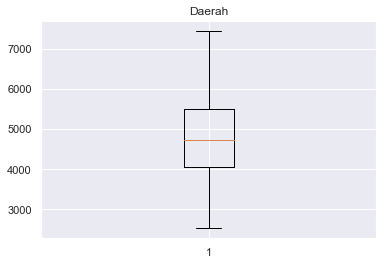

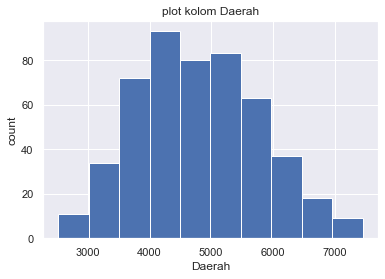

Dari boxplot dan histogram di kolom Daerah, dapat dilihat bahwa data tersebar kurang merata dengan histogram sedikit condong ke kiri. 
Data juga tidak memiliki nilai yang terlalu ekstrem berdasarkan pada boxplot yang tidak memiliki outlier atau extreme. 
Nilai whisker atas dan bawah juga memiliki panjang yang mirip.



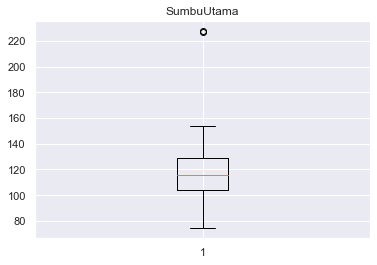

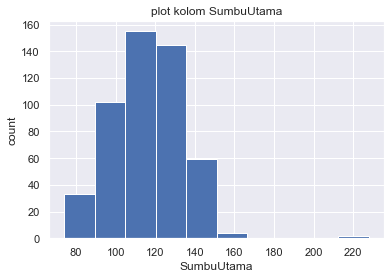

Dari boxplot dan histogram di kolom Daerah, dapat dilihat bahwa data tersebar kurang merata dengan histogram sedikit condong ke kiri. 
Data juga tidak memiliki nilai yang terlalu ekstrem berdasarkan pada boxplot yang tidak memiliki outlier atau extreme. 
Nilai whisker atas dan bawah juga memiliki panjang yang mirip.



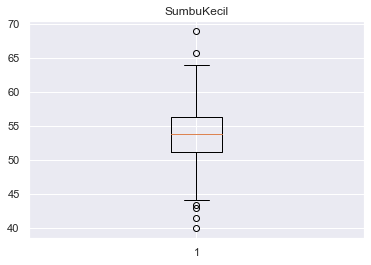

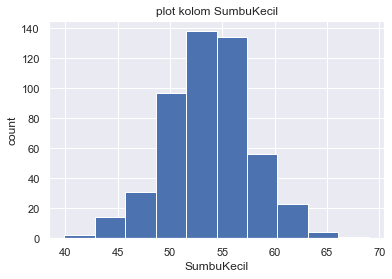

Dari boxplot dan histogram di kolom Daerah, dapat dilihat bahwa data tersebar kurang merata dengan histogram sedikit condong ke kiri. 
Data juga tidak memiliki nilai yang terlalu ekstrem berdasarkan pada boxplot yang tidak memiliki outlier atau extreme. 
Nilai whisker atas dan bawah juga memiliki panjang yang mirip.



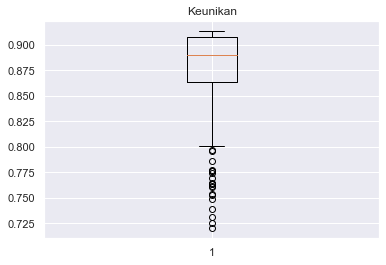

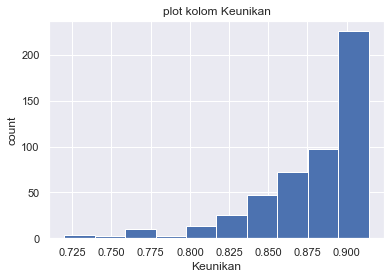

Dari boxplot dan histogram di kolom Daerah, dapat dilihat bahwa data tersebar kurang merata dengan histogram sedikit condong ke kiri. 
Data juga tidak memiliki nilai yang terlalu ekstrem berdasarkan pada boxplot yang tidak memiliki outlier atau extreme. 
Nilai whisker atas dan bawah juga memiliki panjang yang mirip.



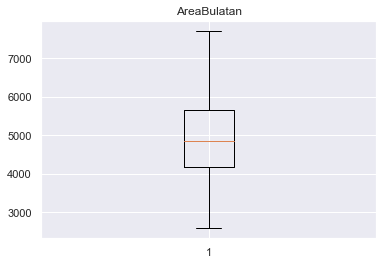

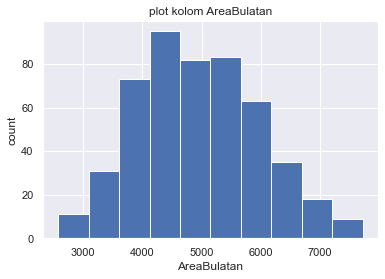

Dari boxplot dan histogram di kolom Daerah, dapat dilihat bahwa data tersebar kurang merata dengan histogram sedikit condong ke kiri. 
Data juga tidak memiliki nilai yang terlalu ekstrem berdasarkan pada boxplot yang tidak memiliki outlier atau extreme. 
Nilai whisker atas dan bawah juga memiliki panjang yang mirip.



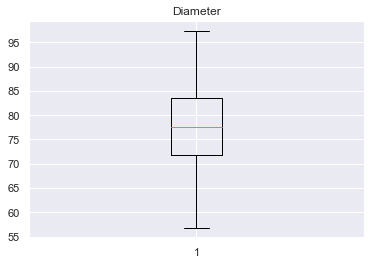

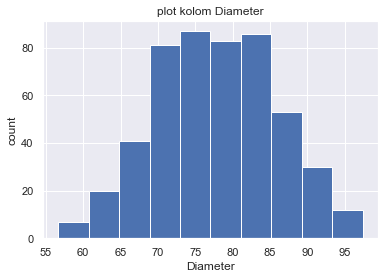

Dari boxplot dan histogram di kolom Daerah, dapat dilihat bahwa data tersebar kurang merata dengan histogram sedikit condong ke kiri. 
Data juga tidak memiliki nilai yang terlalu ekstrem berdasarkan pada boxplot yang tidak memiliki outlier atau extreme. 
Nilai whisker atas dan bawah juga memiliki panjang yang mirip.



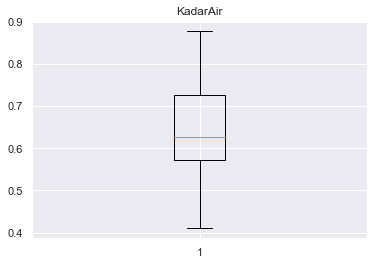

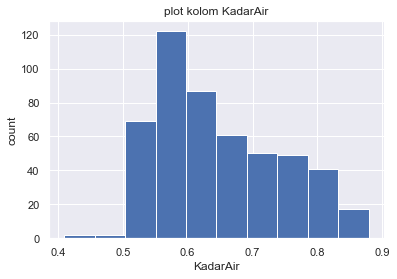

Dari boxplot dan histogram di kolom Daerah, dapat dilihat bahwa data tersebar kurang merata dengan histogram sedikit condong ke kiri. 
Data juga tidak memiliki nilai yang terlalu ekstrem berdasarkan pada boxplot yang tidak memiliki outlier atau extreme. 
Nilai whisker atas dan bawah juga memiliki panjang yang mirip.



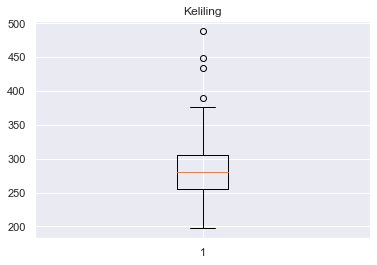

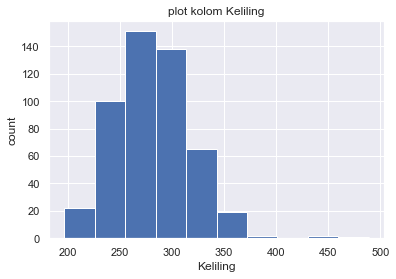

Dari boxplot dan histogram di kolom Daerah, dapat dilihat bahwa data tersebar kurang merata dengan histogram sedikit condong ke kiri. 
Data juga tidak memiliki nilai yang terlalu ekstrem berdasarkan pada boxplot yang tidak memiliki outlier atau extreme. 
Nilai whisker atas dan bawah juga memiliki panjang yang mirip.



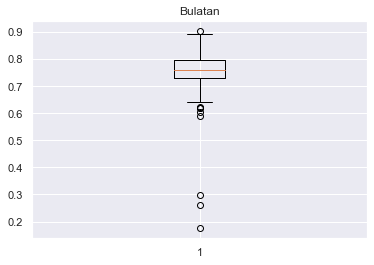

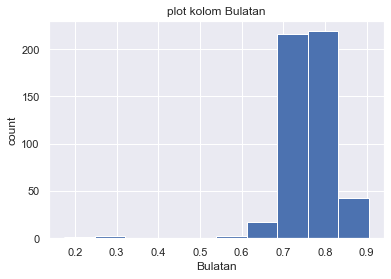

Dari boxplot dan histogram di kolom Daerah, dapat dilihat bahwa data tersebar kurang merata dengan histogram sedikit condong ke kiri. 
Data juga tidak memiliki nilai yang terlalu ekstrem berdasarkan pada boxplot yang tidak memiliki outlier atau extreme. 
Nilai whisker atas dan bawah juga memiliki panjang yang mirip.



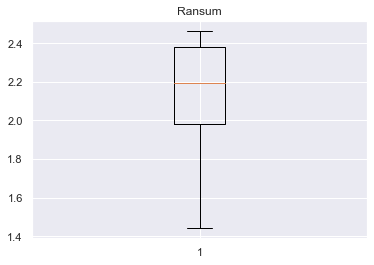

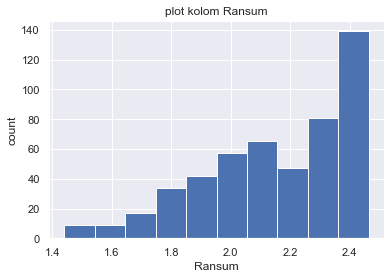

Dari boxplot dan histogram di kolom Daerah, dapat dilihat bahwa data tersebar kurang merata dengan histogram sedikit condong ke kiri. 
Data juga tidak memiliki nilai yang terlalu ekstrem berdasarkan pada boxplot yang tidak memiliki outlier atau extreme. 
Nilai whisker atas dan bawah juga memiliki panjang yang mirip.



In [106]:
penjelasan = [
    "Dari boxplot dan histogram di kolom Daerah, dapat dilihat bahwa data tersebar kurang merata dengan histogram sedikit condong ke kiri. \nData juga tidak memiliki nilai yang terlalu ekstrem berdasarkan pada boxplot yang tidak memiliki outlier atau extreme. \nNilai whisker atas dan bawah juga memiliki panjang yang mirip.",
    "Dari boxplot dan histogram di kolom SumbuUtama, dapat dilihat bahwa data tersebar tidak merata dengan histogram condong ke kiri. \nPada boxplot terdapat outlier sehingga ada data yang cukup ekstrem. \nWalaupun terdapat outlier, panjang whisker atas dan bawah memiliki panjang yang mirip.",
    "Dari boxplot dan histogram di kolom SumbuKecil, dapat dilihat bahwa data tersebar merata walaupun terdapat banyak outlier pada boxplot nya. \nPanjang whisker atas dan bawah memiliki panjang yang mirip.",
    "Dari boxplot dan histogram di kolom Keunikan, dapat dilihat bahwa data tersebar tidak merata dengan histogram yang condong ke kanan dan terdapat banyak outlier yang melewati whisker bawah. \nPerbandingan panjang whisker atas dan bawah sangat jauh dengan whisker atas sangat kecil dan whisker bawah sangat panjang. \nLetak median juga berada pada bagian atas pada boxplot. \nHal ini menunjukkan bahwa lebih dari 50 persen data berada pada bagian kanan pada histogram dan atas pada boxplot tetapi terdapat sebagian data yang nilainya sangat kecil sehingga pada boxplot terlihat ada banyak outlier dengan whisker bawah yang panjang.",
    "Dari boxplot dan histogram di kolom AreaBulatan, dapat dilihat bahwa data tersebar kurang merata dengan histogram sedikit condong ke kiri. \nData tidak memiliki nilai yang terlalu ekstrem berdasarkan pada boxplot yang tidak memiliki outlier atau extreme. \nNilai whisker atas dan bawah juga memiliki panjang yang mirip.",
    "Dari boxplot dan histogram di kolom Diameter, dapat dilihat bahwa data tersebar merata walaupun histogram sedikit condong ke kiri. \nData tidak memiliki nilai yang terlalu ekstrem berdasarkan pada boxplot yang tidak memiliki outlier atau extreme. \nNilai whisker atas dan bawah juga memiliki panjang yang mirip.",
    "Dari boxplot dan histogram di kolom KadarAir, dapat dilihat bahwa data tersebar kurang merata dengan histogram sedikit condong ke kiri. \nData tidak memiliki nilai yang terlalu ekstrem berdasarkan pada boxplot yang tidak memiliki outlier atau extreme. \nNilai whisker atas dan bawah juga memiliki panjang yang mirip. Nilai median berada pada bagian bawah pada boxplot, hal ini menunjukkan bahwa sebagian besar data bernilai kecil.",
    "Dari boxplot dan histogram di kolom Keliling, dapat dilihat bahwa data tersebar tidak merata dengan histogram condong ke kiri dan terdapat banyak beberapa outlier yang melewati whisker atas. \nNilai whisker atas dan bawah memiliki panjang yang mirip.",
    "Dari boxplot dan histogram di kolom Bulatan, dapat dilihat bahwa data tersebar tidak merata dengan histogram condong ke kanan yang artinya sebagian besar datanya bernilai besar. \nDapat dilihat pada boxplot bahwa terdapat banyak outlier pada bagian bawah. \nNilai whisker atas dan bawah memiliki panjang yang mirip.",
    "Dari boxplot dan histogram di kolom Ransum, dapat dilihat bahwa data tersebar tidak merata dengan histogram condong ke kanan. \nPerbandingan panjang whisker atas dan bawah cukup jauh dengan whisker atas cukup kecil dan whisker bawah sangat panjang. \nHal ini menunjukkan lebih dari 50 persen data bernilai besar."
]

for att in attribute:
    counter = 0
    if (att == "Kelas"):
        continue
        
    x_axis = data[att] # kolom yang dituju
    plt.boxplot(x_axis)
    plt.title(att)
    plt.show()
    
    plt.hist(x_axis)
    plt.title("plot kolom "+ att)
    plt.xlabel(att)
    plt.ylabel("count")
    plt.show()

    print(penjelasan[counter])
    counter = counter + 1
    print()
    



# Soal 3

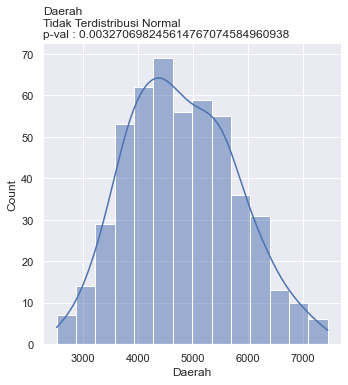

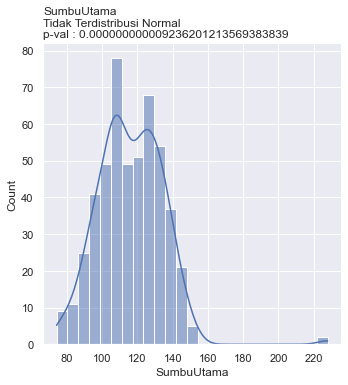

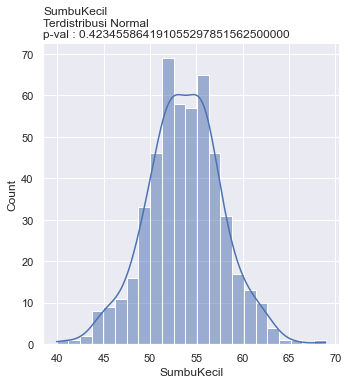

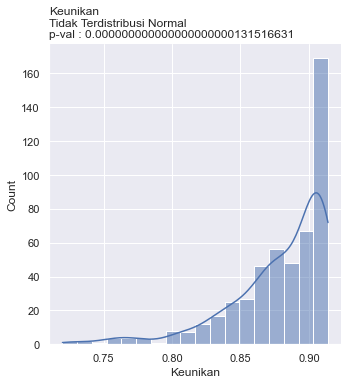

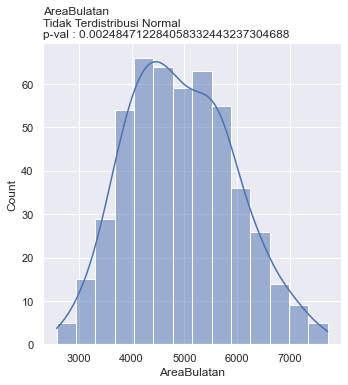

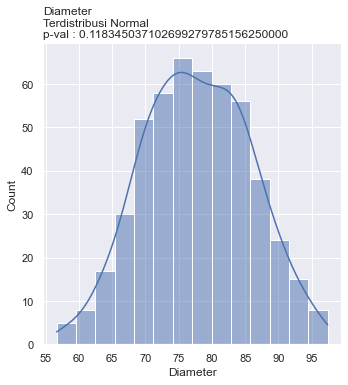

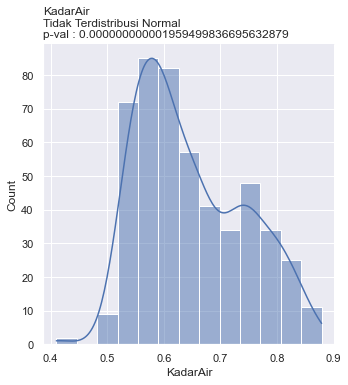

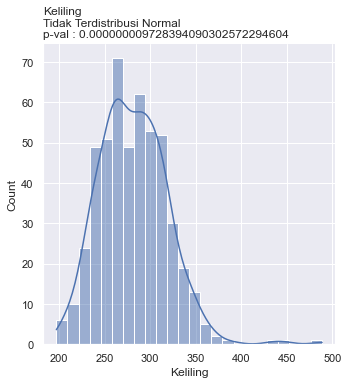

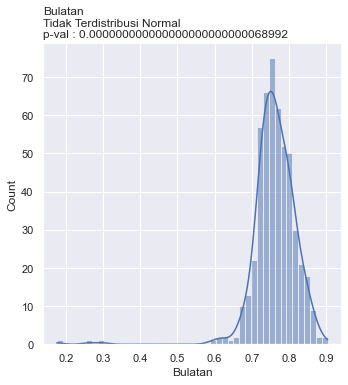

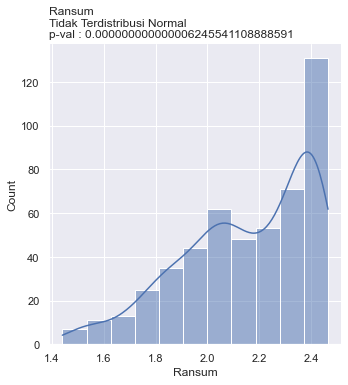

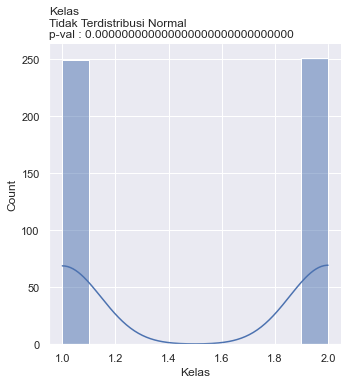

In [107]:
alpha = 0.05
for att in attribute:
    ax = sns.displot(data[att], kde=True)
    
    stat, p = shapiro(data[att])

    if (p > alpha):
        plt.title(att + "\n" + "Terdistribusi Normal\n" + "p-val : " + str("%.30f" % p), loc="left")
    else:
        plt.title(att + "\n" + "Tidak Terdistribusi Normal\n" + "p-val : " + str("%.30f" % p), loc="left")
    
    

In [108]:
def showTest(H0, H1, statistiktemp, formula, z_alpha, critical, z, pval):

    crit = "Critical Region : " + critical
    statistik = "Uji statistik " + statistiktemp 

    print(H0)
    print(H1)
    print()
    print(statistik)
    print(formula)
    print(z_alpha)
    print(crit)
    print()
    if (z != ""):
        print("Z =", z)
    print("P-values =", pval)

# Soal 4.a

H0 : u > 4700
H1 : u <= 4700

Uji statistik z test
z = (avg - u) / (std/(n^(1/2)))
z_alpha = 1.645
Critical Region : z > z_alpha

Z = 2.2951538242525173
P-values = 0.010862155196799872
Hipotesis H0 ditolak


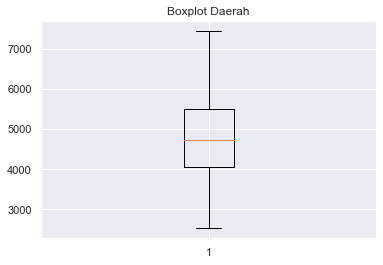

In [109]:
u = 4700
z_alpha = 1.645
avg = data["Daerah"].mean()
std = data["Daerah"].std()
n = len(data.index)
z = (avg - u) / (std/(n**(1/2)))
# print("Z = " + str(z))
pval = norm.sf(abs(z))

showTest(
    "H0 : u > 4700", 
    "H1 : u <= 4700", 
    "z test", 
    "z = (avg - u) / (std/(n^(1/2)))", 
    "z_alpha = 1.645", 
    "z > z_alpha", 
    z, pval
)


if(z > z_alpha):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")


plt.figure()
plt.boxplot(data["Daerah"])
plt.title("Boxplot Daerah")
plt.show()

# Soal 4.b

H0 : u != 116
H1 : u = 116

Uji statistik z test
z = (avg - u) / (std/(n^(1/2)))
z_alpha/2 = 1.960
Critical Region : z > z_alpha/2 or z < -z_alpha/2

Z = 0.05524712326730106
P-values = 0.477970793648876
Hipotesis H0 diterima


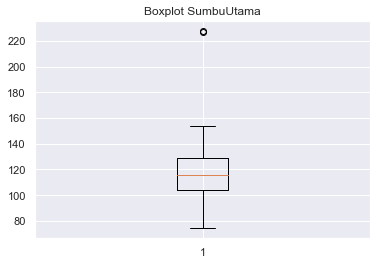

In [110]:
u = 116
z_alphaP2 = 1.960
avg = data["SumbuUtama"].mean()
std = data["SumbuUtama"].std()
n = len(data.index)
z = (avg - u) / (std/(n**(1/2)))

pval = norm.sf(abs(z))

showTest(
    "H0 : u != 116", 
    "H1 : u = 116", 
    "z test", 
    "z = (avg - u) / (std/(n^(1/2)))", 
    "z_alpha/2 = 1.960", 
    "z > z_alpha/2 or z < -z_alpha/2", 
    z, pval
)

if(z > z_alphaP2 or z < -z_alphaP2):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")


plt.figure()
plt.boxplot(data["SumbuUtama"])
plt.title("Boxplot SumbuUtama")
plt.show()

# Soal 4.c

H0 : u != 50
H1 : u = 50

Uji statistik t test
t = (avg - u) / (std/(n**(1/2)))
t_alpha = 1.645
Critical Region : t > t_alpha

P-values = 3.3020185644244998e-06
t = 6.478168916968894
Hipotesis H0 ditolak


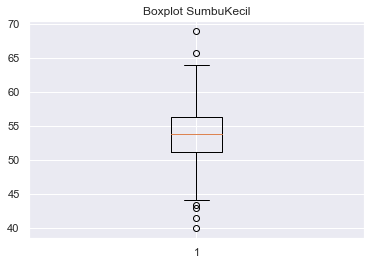

In [111]:
u = 50
t_alpha = 1.729
dataSK = data.head(20)
avg = dataSK["SumbuKecil"].mean()
std = dataSK["SumbuKecil"].std()
n = len(dataSK.index)
t = (avg - u) / (std/(n**(1/2)))

stat, pval = ttest_1samp(dataSK["SumbuKecil"], 50)

showTest(
    "H0 : u != 50", 
    "H1 : u = 50", 
    "t test", 
    "t = (avg - u) / (std/(n**(1/2)))", 
    "t_alpha = 1.645", 
    "t > t_alpha", 
    "", pval
)
print("t =", t)

if(t > t_alpha):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")


plt.figure()
plt.boxplot(data["SumbuKecil"])
plt.title("Boxplot SumbuKecil")
plt.show()

# Soal 4.d

H0 : u = 0.15
H1 : u != 0.15

Uji statistik z test
z = (p_hat - u) / ((u*(1-u)/n)^(1/2))
z_alpha/2 = 1.960
Critical Region : z > z_alpha/2 or z < -z_alpha/2

Z = 2.755386880774658
P-values = 0.477970793648876
Hipotesis H0 ditolak


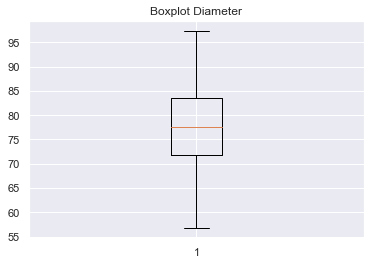

In [112]:
u = 0.15
z_alphaP2 = 1.960
dataD85 = data[data["Diameter"] > 85]
x = len(dataD85.index)
n = len(data.index)
p_hat = x/n
pval = norm.sf(abs(z))
z = (p_hat - u) / ((u*(1-u)/n)**(1/2))

showTest(
    "H0 : u = 0.15", 
    "H1 : u != 0.15", 
    "z test", 
    "z = (p_hat - u) / ((u*(1-u)/n)^(1/2))", 
    "z_alpha/2 = 1.960", 
    "z > z_alpha/2 or z < -z_alpha/2", 
    z, pval
)

if(z < -z_alphaP2 or z > z_alphaP2):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")


plt.figure()
plt.boxplot(data["Diameter"])
plt.title("Boxplot Diameter")
plt.show()

# Soal 4.e

H0 : u < 0.05
H1 : u >= 0.05

Uji statistik z test
z = (p_hat - u) / ((u*(1-u)/n)^(1/2))
z_alpha = 1.645
Critical Region : z > z_alpha

Z = -5.129891760425771
P-values = 1.4495441414387716e-07
Hipotesis H0 diterima


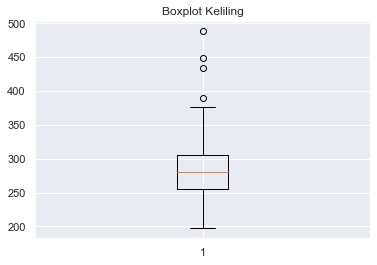

In [113]:
u = 0.05
z_alpha = 1.645
dataK100 = data[data["Keliling"] < 100]
x = len(dataK100.index)
n = len(data.index)
p_hat = x/n
z = (p_hat - u) / ((u*(1-u)/n)**(1/2))
# print("Z = " + str(z))

pval = norm.sf(abs(z))

showTest(
    "H0 : u < 0.05", 
    "H1 : u >= 0.05", 
    "z test", 
    "z = (p_hat - u) / ((u*(1-u)/n)^(1/2))", 
    "z_alpha = 1.645", 
    "z > z_alpha", 
    z, pval
)

if(z > z_alpha):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")


plt.figure()
plt.boxplot(data["Keliling"])
plt.title("Boxplot Keliling")
plt.show()

# print("P-values = " + str(pval))

# Soal 5.a

H0 : u = u0
H1 : u != u0

Uji statistik z test
z = (X1 - X2) / (sqrt( ((sd1^2)/n1) + ((sd2^2)/n2) ))
z_alpha/2 = 1.960
Critical Region : z > z_alpha/2 or z < -z_alpha/2

Z = 17.013036648485464
P-values = 6.574024595618948e-65
Hipotesis H0 ditolak


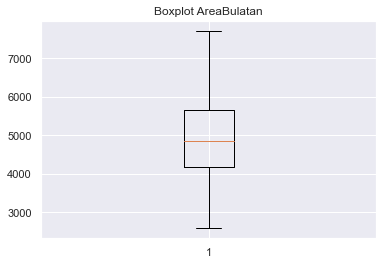

In [114]:
col = "AreaBulatan"
data1 = data[col][0:250]
data2 = data[col][250:500]

z_alphaP2 = 1.960

n1 = len(data1)
n2 = len(data2)

sd1 = data1.std()
sd2 = data2.std()

X1 = data1.mean()
X2 = data2.mean()

mudiff = 0

z = (X1 - X2) / (sqrt( ((sd1**2)/n1) + ((sd2**2)/n2) ))
pval = 2*(norm.sf(abs(z)))

showTest(
    "H0 : u = u0", 
    "H1 : u != u0", 
    "z test", 
    "z = (X1 - X2) / (sqrt( ((sd1^2)/n1) + ((sd2^2)/n2) ))", 
    "z_alpha/2 = 1.960", 
    "z > z_alpha/2 or z < -z_alpha/2", 
    z, pval
)



if(z < -z_alphaP2 or z > z_alphaP2):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

plt.figure()
plt.boxplot(data[col])
plt.title("Boxplot " + col)
plt.show()

# Soal 5.b

H0 : u = u0 + 0.2
H1 : u != u0 + 0.2

Uji statistik z test
z = (X1 - X2) / (sqrt( ((sd1^2)/n1) + ((sd2^2)/n2) ))
z_alpha/2 = 1.960
Critical Region : z > z_alpha/2 or z < -z_alpha/2

Z = -3.0164987047810152
P-values = 0.002557123103289445
Hipotesis H0 ditolak


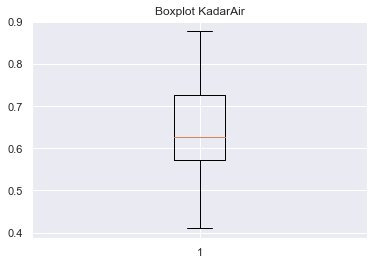

In [115]:
# H0 : |u1 = u2 + 0.2|
# H1 : |u1 > u2 + 0.2|
col = "KadarAir"
dataKA1 = data[col][0:250]
dataKA2 = data[col][250:500]

z_alphaP2 = 1.282

nKA1 = len(dataKA1)
nKA2 = len(dataKA2)

sdKA1 = dataKA1.std()
sdKA2 = dataKA2.std()

xKA1 = dataKA1.mean()
xKA2 = dataKA2.mean()


z = (xKA1 - xKA2) / (sqrt( ((sdKA1**2)/nKA1) + ((sdKA2**2)/nKA2) ))

pval = 2*(norm.sf(abs(z)))

showTest(
    "H0 : u = u0 + 0.2", 
    "H1 : u != u0 + 0.2", 
    "z test", 
    "z = (X1 - X2) / (sqrt( ((sd1^2)/n1) + ((sd2^2)/n2) ))", 
    "z_alpha/2 = 1.960", 
    "z > z_alpha/2 or z < -z_alpha/2", 
    z, pval
)

if(z > z_alphaP2 or z < -z_alphaP2):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

plt.figure()
plt.boxplot(data[col])
plt.title("Boxplot " + col)
plt.show()

# Soal 5.c

H0 : u = u0
H1 : u != u0

Uji statistik z test
z = (X1 - X2) / (sqrt( ((sd1^2)/n1) + ((sd2^2)/n2) ))
z_alpha/2 = 2.093
Critical Region : z > z_alpha/2 or z < -z_alpha/2

Z = -3.4577735622078336
P-values = 0.0005446589606626397
Hipotesis H0 ditolak


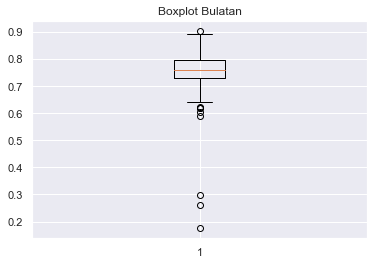

In [116]:
col = "Bulatan"

data1 = data[col][0:20]
data2 = data[col][479:500]

z_alphaP2 = 2.093

n1 = len(data1)
n2 = len(data2)

sd1 = data1.std()
sd2 = data2.std()

X1 = data1.mean()
X2 = data2.mean()

z = (X1 - X2) / (sqrt( ((sd1**2)/n1) + ((sd2**2)/n2) ))
pval = 2*(norm.sf(abs(z)))

showTest(
    "H0 : u = u0", 
    "H1 : u != u0", 
    "z test", 
    "z = (X1 - X2) / (sqrt( ((sd1^2)/n1) + ((sd2^2)/n2) ))", 
    "z_alpha/2 = 2.093", 
    "z > z_alpha/2 or z < -z_alpha/2", 
    z, pval
)

if(z > z_alphaP2 or z < -z_alphaP2):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

plt.figure()
plt.boxplot(data[col])
plt.title("Boxplot " + col)
plt.show()

# Soal 5.d

H0 : P1 <= P2
H1 : P1 > P2

Uji statistik z test
z = (p1 - p2) / (sqrt( pBar*(1-pBar) * ((1/n1) + (1/n2)) ))
z_alpha/2 = 1.960
Critical Region : z > z_alpha/2 or z < -z_alpha/2

Z = 13.397486455610238
P-values = 6.254573593207953e-41
Hipotesis H0 ditolak


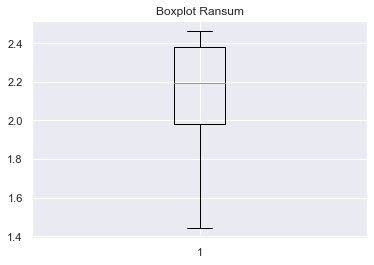

In [117]:
col = "Ransum"
data1 = data[col][0:250]
data2 = data[col][250:500]

data1 = data1[data1 > 2]
data2 = data2[data2 > 2]

z_alphaP2 = 1.960

n1 = 250
n2 = 250

x1 = len(data1)
x2 = len(data2)

p1 = x1/n1
p2 = x2/n2

pBar = (x1 + x2) / (n1 + n2)

z = (p1 - p2) / (sqrt( pBar*(1-pBar) * ((1/n1) + (1/n2)) ))

pval = 2*(norm.sf(abs(z)))

showTest(
    "H0 : P1 <= P2", 
    "H1 : P1 > P2", 
    "z test", 
    "z = (p1 - p2) / (sqrt( pBar*(1-pBar) * ((1/n1) + (1/n2)) ))", 
    "z_alpha/2 = 1.960", 
    "z > z_alpha/2 or z < -z_alpha/2", 
    z, pval
)

if(z > z_alphaP2 or z < -z_alphaP2):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

plt.figure()
plt.boxplot(data[col])
plt.title("Boxplot " + col)
plt.show()

# Soal 5.e

H0 : u = u0
H1 : u != u0

Uji statistik F test
F = var1 / var2
f_alpha/2 = 1
Critical Region : P-values > 0.05 

P-values = 0.26278959201893937
F = 1.083878022042188
Hipotesis H0 diterima


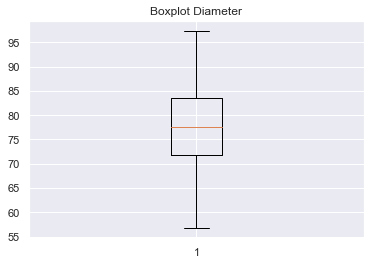

In [118]:
col = "Diameter"
data1 = data[col][0:250]
data2 = data[col][250:500]

f_alphaP2 = 1

var1 = data1.var()
var2 = data2.var()

f = var1/var2

dfn = len(data1) -1
dfd = len(data2) -1

pval = 1-stats.f.cdf(f, dfn, dfd)

showTest(
    "H0 : u = u0", 
    "H1 : u != u0", 
    "F test", 
    "F = var1 / var2", 
    "f_alpha/2 = 1", 
    "P-values > 0.05 ", 
    "", pval
)

print("F =", f)

if(pval <= 0.05):
    print("Hipotesis H0 ditolak")
else:
    print("Hipotesis H0 diterima")

plt.figure()
plt.boxplot(data[col])
plt.title("Boxplot " + col)
plt.show()

# Soal 6

Korelasi antara Daerah dan Kelas
-0.6027466517416662


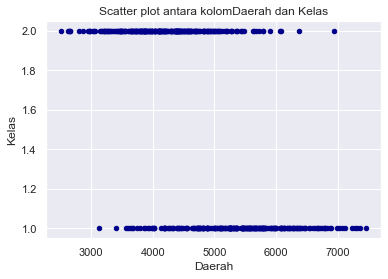


Korelasi antara SumbuUtama dan Kelas
-0.7130906104204593


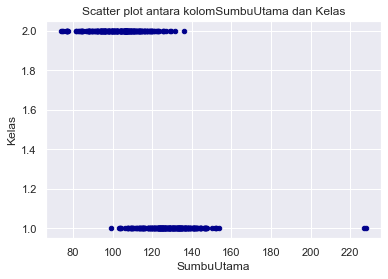


Korelasi antara SumbuKecil dan Kelas
-0.15297517335535027


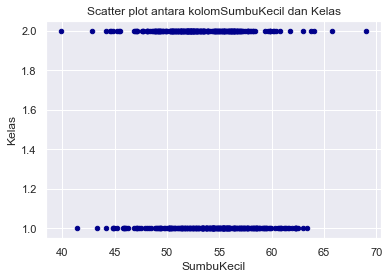


Korelasi antara Keunikan dan Kelas
-0.7304563686511922


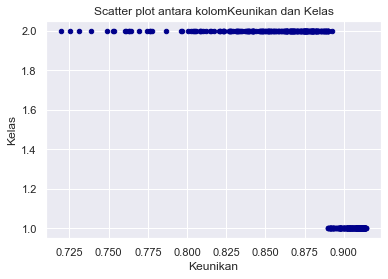


Korelasi antara AreaBulatan dan Kelas
-0.6073125434153751


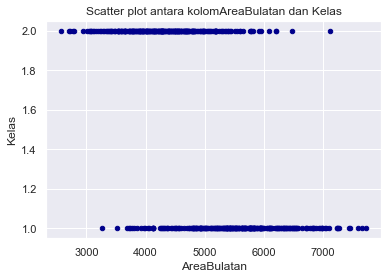


Korelasi antara Diameter dan Kelas
-0.6025356896618813


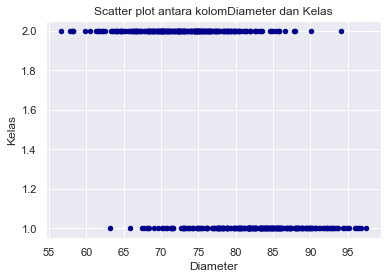


Korelasi antara KadarAir dan Kelas
0.13434422605727642


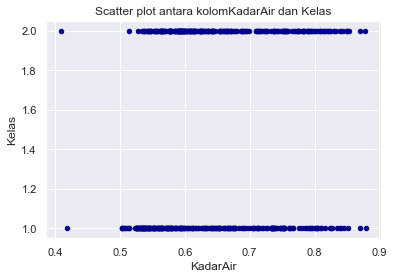


Korelasi antara Keliling dan Kelas
-0.6348607454756858


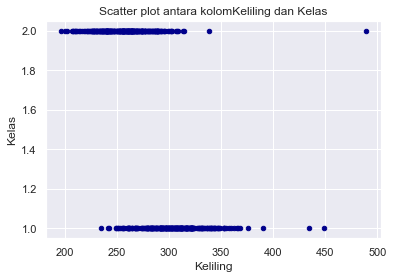


Korelasi antara Bulatan dan Kelas
0.5450045317240076


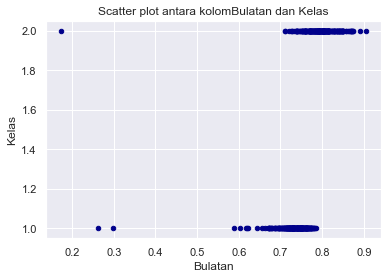


Korelasi antara Ransum dan Kelas
-0.8399038681287493


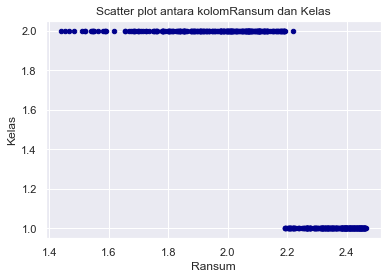

In [119]:
for att in attribute:
    if (att == "Kelas"):
        continue

    column_1 = data[att]
    column_2 = data["Kelas"]
    correlation = column_1.corr(column_2)
    print("Korelasi antara", att, "dan Kelas")
    print(correlation)
    
    corrTitle = "Scatter plot antara kolom"+ att+ " dan Kelas"
    data.plot.scatter(x=att, y='Kelas', title= corrTitle, color='DarkBlue')
    plt.show()
    print()